In [21]:
import psycopg2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import plotly.graph_objs as go
import seaborn as sns
import vaex
import numpy as np
import requests as re
import datetime as dt
import datetime as dt
from datetime import date
from datetime import time
import scipy.stats as st
from scipy.stats import norm, normaltest
import statistics
import statsmodels.api as sm
from scipy import stats
import plotly.express as px
from scipy.stats import kstest
from scipy.stats import shapiro
plt.rcParams["figure.figsize"] = (15,6)

## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [24]:
df_flights = pd.read_csv('/Users/perpetualokafor/Downloads/mid-term-project-I/flights1.csv',index_col=0)

In [25]:
df_flights.head(5)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-26,WN,WN,WN,1885,WN,N261WN,1885,14893,SMF,...,649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-26,AA,AA,AA,2294,AA,N5007E,2294,11433,DTW,...,1145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-14,DL,DL,DL,45,DL,N348NW,45,12478,JFK,...,944.0,0.0,0.0,36.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2018-07-07,UA,UA_CODESHARE,UA,4104,EV,N11165,4104,11618,EWR,...,644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-06-17,AA,AA_CODESHARE,AA,5166,OH,N253PS,5166,11057,CLT,...,221.0,135.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN,NaN


In [26]:
pd.isnull(df_flights).sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                 1593
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 8223
dep_delay                8382
taxi_out                 8682
wheels_off               8682
wheels_on                8923
taxi_in                  8923
crs_arr_time                0
arr_time                 8736
arr_delay                9848
cancelled                   0
cancellation_code      491448
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      9777
air_time                 9964
flights                     0
distance                    0
carrier_de

In [44]:
# df_flights = df_flights.drop(['cancellation_code','carrier_delay','weather_delay',
#                               'nas_delay','security_delay','late_aircraft_delay',
#                               'first_dep_time','total_add_gtime','longest_add_gtime','no_name'], axis=1)

In [27]:
df_flights.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,491777.000000,491618.000000,491318.000000,491318.000000,491077.000000,...,500000.000000,94396.000000,94396.000000,94396.000000,94396.000000,94396.000000,3326.00000,3326.000000,3326.000000,0.0
mean,2734.581006,2734.580710,12679.973716,12680.717350,1330.185050,1334.753293,10.459153,17.532960,1359.155227,1459.472325,...,768.093034,20.365969,3.592896,16.060342,0.096392,27.226048,1322.64101,39.745039,38.879435,NaN
std,1860.356356,1860.477969,1521.919668,1523.522617,490.053306,503.875822,47.711468,10.057849,505.325428,533.069567,...,586.824730,63.075506,30.441680,37.661228,4.476038,53.664930,498.65955,35.188958,33.117847,NaN
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-213.000000,0.000000,1.000000,1.000000,...,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.00000,1.000000,1.000000,NaN
25%,1130.000000,1130.000000,11292.000000,11292.000000,915.000000,917.000000,-6.000000,11.000000,933.000000,1043.000000,...,340.000000,0.000000,0.000000,0.000000,0.000000,0.000000,857.25000,17.000000,17.000000,NaN
50%,2316.000000,2316.000000,12889.000000,12889.000000,1324.000000,1328.000000,-2.000000,15.000000,1342.000000,1500.000000,...,602.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1340.00000,29.000000,29.000000,NaN
75%,4322.000000,4322.000000,14057.000000,14057.000000,1735.000000,1744.000000,6.000000,20.000000,1759.000000,1909.000000,...,1005.000000,18.000000,0.000000,19.000000,0.000000,33.000000,1728.00000,50.000000,49.000000,NaN
max,9391.000000,9391.000000,16869.000000,16869.000000,2359.000000,2400.000000,1966.000000,177.000000,2400.000000,2400.000000,...,5095.000000,1780.000000,1331.000000,1278.000000,1048.000000,1966.000000,2352.00000,295.000000,225.000000,NaN


In [28]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [30]:
#Get the mean & std of arr_delay column.
mean_arr_delay = df_flights.arr_delay.mean()
std_arr_delay = df_flights.arr_delay.std()
#Print mean & std
print('Mean:',mean_arr_delay)
print('STD:',std_arr_delay)

Mean: 5.3807308753203085
STD: 49.721047240592995


In [31]:
mean_dep_delay = df_flights.dep_delay.mean()
std_dep_delay = df_flights.dep_delay.std()
print('Mean:',mean_dep_delay)
print('STD:',std_dep_delay)

Mean: 10.459153244999166
STD: 47.71146811658047


(-300.0, 300.0)

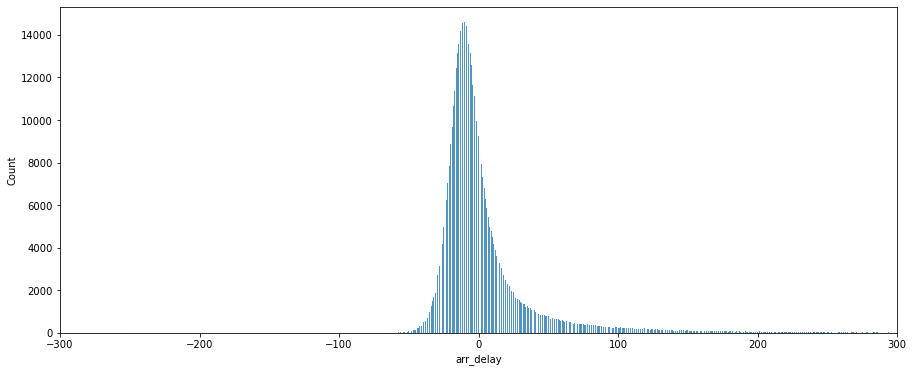

In [32]:
# arr_delay
arr_delay = df_flights['arr_delay']
sns.histplot(arr_delay)
plt.xlim(-300, 300)

(-300.0, 300.0)

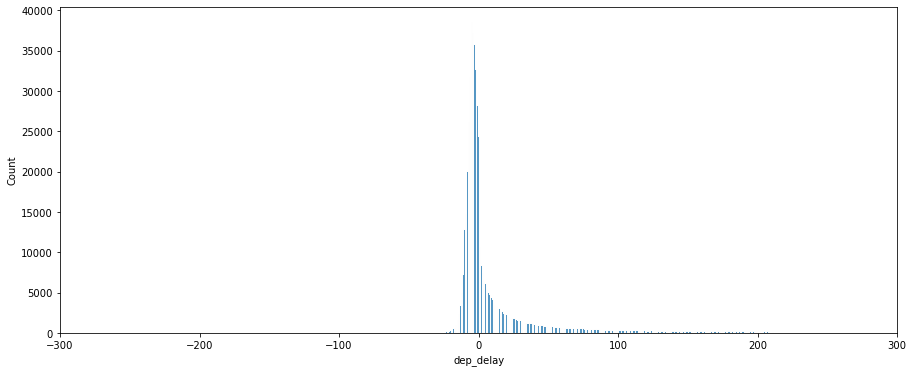

In [33]:
# dep_delay
dep_delay = df_flights['dep_delay']
sns.histplot(dep_delay)
plt.xlim(-300, 300)

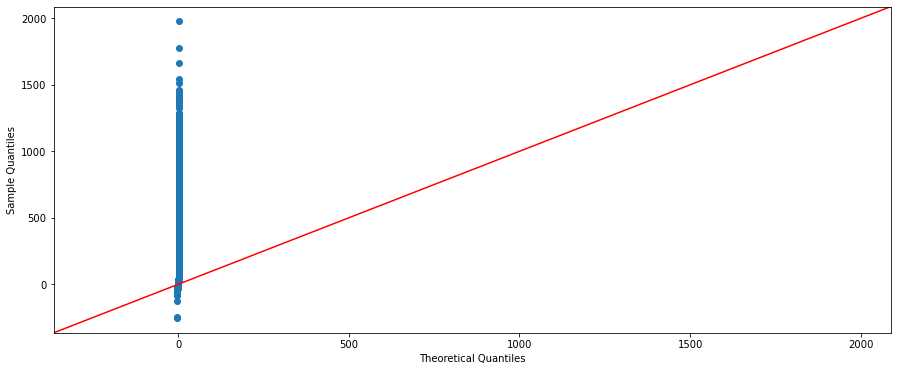

In [34]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(arr_delay, line='45')

plt.show()
#if points fall on a straight line then we assume it is normally distributed. this case it is not

In [35]:
#(Formal Statistical Test) Perform a Shapiro-Wilk Test.
#If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.
shapiro(arr_delay)

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [36]:
shapiro(dep_delay)

ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
#it is not a normal distribution.
#mean is not 0

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [37]:
df_flights['datetime'] = pd.to_datetime(df_flights.fl_date)
df_flights['day'] = df_flights['datetime'].dt.day
df_flights['month'] = df_flights['datetime'].dt.month
df_flights['year'] = df_flights['datetime'].dt.year

In [38]:
mean_month_arr_delay = df_flights.groupby('month', as_index=False)['arr_delay'].mean()
print(mean_month_arr_delay)

    month  arr_delay
0       1   4.276098
1       2   6.833166
2       3   2.237380
3       4   4.238182
4       5   6.250616
5       6  10.516499
6       7   9.041294
7       8   9.029166
8       9   1.574198
9      10   2.784182
10     11   2.832106
11     12   4.443169


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

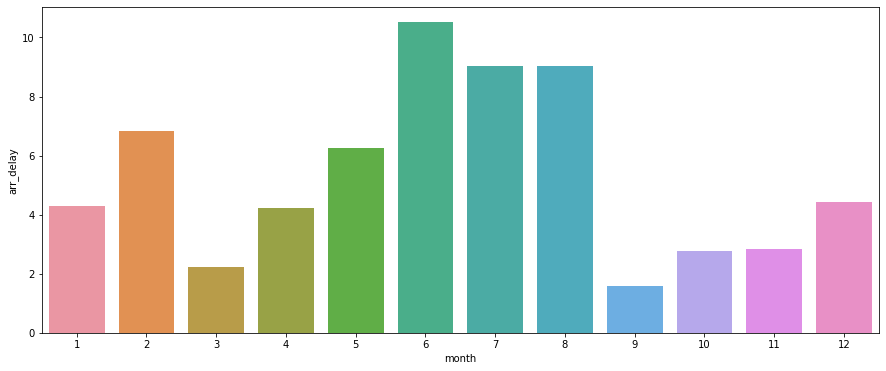

In [39]:
sns.barplot(x='month',y='arr_delay',data=mean_month_arr_delay)

In [40]:
mean_month_dep_delay = df_flights.groupby('month',as_index=False)['dep_delay'].mean()
print(mean_month_dep_delay)

    month  dep_delay
0       1  10.108453
1       2  11.781598
2       3   7.851465
3       4   9.509712
4       5  11.038616
5       6  14.719391
6       7  13.856742
7       8  13.483458
8       9   6.874904
9      10   7.578434
10     11   7.951770
11     12  10.353325


<AxesSubplot:xlabel='month', ylabel='dep_delay'>

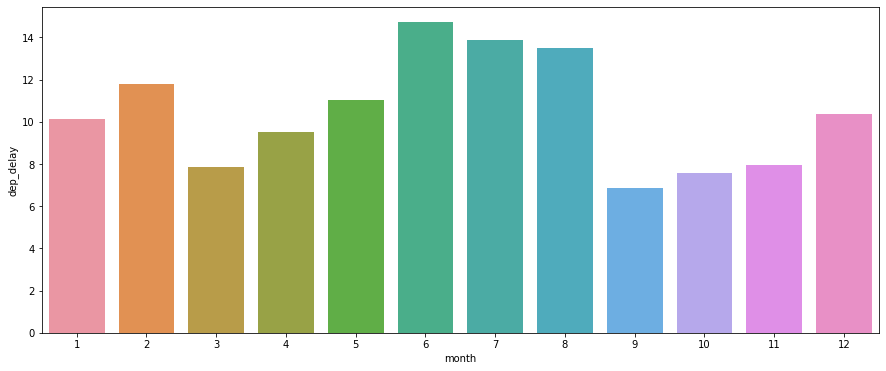

In [41]:
sns.barplot(x='month',y='dep_delay',data=mean_month_dep_delay)

In [ ]:
#flights are delayed mainly in June

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [42]:
city_df = df_flights.drop_duplicates('origin_city_name')[['origin_city_name','fl_date']]

In [43]:
city_df_sample = city_df.sample(100)

In [44]:
weather_data = city_df_sample.values.tolist()

In [45]:
weather = []
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history"
api_key = '8FKLHVPA65QJLV5CM3JXZZN5E'

for i in weather_data:
    
    start_date = dt.datetime.strptime(i[1], "%Y-%m-%d")
    end_date = start_date + dt.timedelta(days=1)

    
    querystring = {"contentType":"json",
               "startDateTime":f"{str(start_date.date())}T00:00:00",
               "aggregateHours":"24","location":f"{i[0]}",
               "endDateTime":f"{str(end_date.date())}T00:00:00",
               "unitGroup":"us",
               "key":api_key}
    
    res = re.request("GET", url, params=querystring)
    weather.append(res.json())

In [46]:
weather_list = []
for i in range(len(weather_data)):
    if i == None:
        pass
    else:
        weather_list.append(weather[i]['locations'][weather_data[i][0]]['values'][0]['conditions'])

In [47]:
city_df_sample['weather'] = weather_list
city_df_sample.head()

,origin_city_name,fl_date,weather
103,"Dayton, OH",2018-04-13,Partially cloudy
10986,"Kapalua, HI",2019-02-02,"Rain, Partially cloudy"
31,"Washington, DC",2019-11-29,Overcast
174,"Santa Ana, CA",2019-08-20,Clear
8389,"Jamestown, ND",2019-08-26,Partially cloudy


In [48]:
weather_sampledf = pd.merge(city_df_sample, df_flights[['dep_delay','arr_delay']], left_index=True, right_index=True)
weather_sampledf.sort_values('arr_delay',ascending=False)

,origin_city_name,fl_date,weather,dep_delay,arr_delay
216,"Hays, KS",2018-06-24,"Rain, Partially cloudy",569.0,572.0
40,"Pocatello, ID",2018-02-23,Partially cloudy,232.0,224.0
7556,"North Bend/Coos Bay, OR",2018-08-21,Clear,120.0,129.0
2936,"Santa Rosa, CA",2018-12-01,"Rain, Partially cloudy",114.0,120.0
1123,"Brainerd, MN",2019-01-26,Partially cloudy,121.0,113.0
...,...,...,...,...,...
6689,"Eau Claire, WI",2019-03-30,"Snow, Partially cloudy",-9.0,-32.0
10986,"Kapalua, HI",2019-02-02,"Rain, Partially cloudy",NaN,NaN
836,"Burbank, CA",2019-02-17,Partially cloudy,NaN,NaN
863,"Bloomington/Normal, IL",2018-08-13,Clear,NaN,NaN


In [49]:
weather_sampledf.sort_values('dep_delay',ascending=False)

,origin_city_name,fl_date,weather,dep_delay,arr_delay
216,"Hays, KS",2018-06-24,"Rain, Partially cloudy",569.0,572.0
40,"Pocatello, ID",2018-02-23,Partially cloudy,232.0,224.0
1123,"Brainerd, MN",2019-01-26,Partially cloudy,121.0,113.0
7556,"North Bend/Coos Bay, OR",2018-08-21,Clear,120.0,129.0
2936,"Santa Rosa, CA",2018-12-01,"Rain, Partially cloudy",114.0,120.0
...,...,...,...,...,...
24303,"Kodiak, AK",2019-02-17,"Rain, Partially cloudy",-27.0,-29.0
10986,"Kapalua, HI",2019-02-02,"Rain, Partially cloudy",NaN,NaN
836,"Burbank, CA",2019-02-17,Partially cloudy,NaN,NaN
863,"Bloomington/Normal, IL",2018-08-13,Clear,NaN,NaN


<AxesSubplot:xlabel='weather', ylabel='arr_delay'>

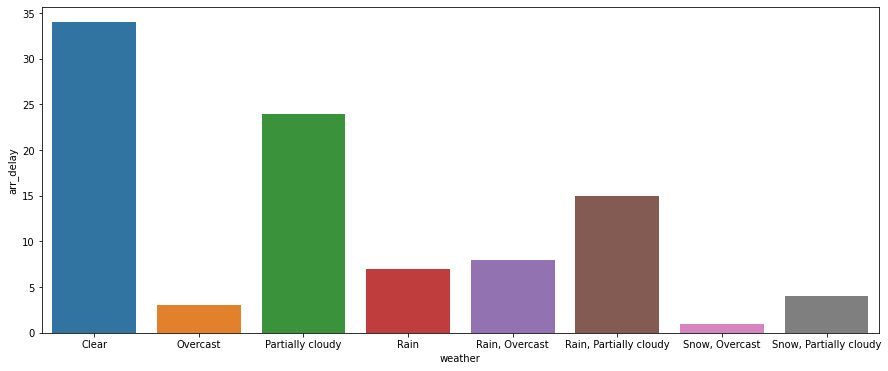

In [50]:
weather_arr_delay = weather_sampledf.groupby('weather',as_index=False)['arr_delay'].count()
sns.barplot(x='weather',y='arr_delay',data=weather_arr_delay)

<AxesSubplot:xlabel='weather', ylabel='dep_delay'>

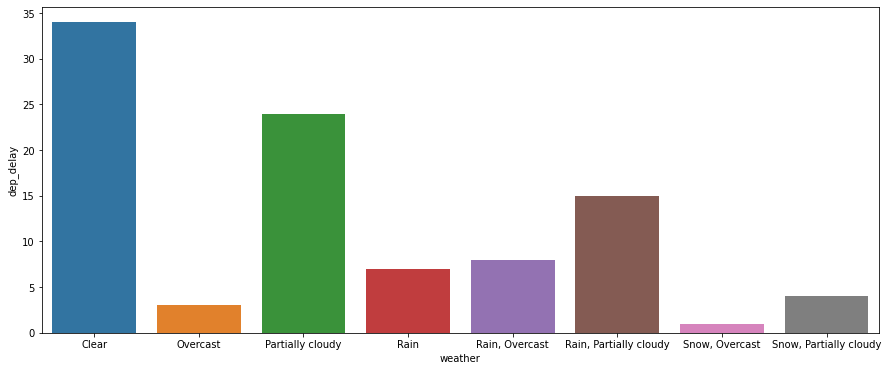

In [51]:
weather_dep_delay = weather_sampledf.groupby('weather',as_index=False)['dep_delay'].count()
sns.barplot(x='weather',y='dep_delay',data=weather_dep_delay)

In [ ]:
#doesnt seem like weather is a significant indicator of delays because there are higher delays when the weather is good

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [67]:
#create arrival and dept time hour columns
df_flights['arr_hour'] = df_flights['arr_time'].astype(str).str[:-4]
df_flights['dep_hour'] = df_flights['dep_time'].astype(str).str[:-4]
df_flights = df_flights.dropna(axis=0, how='any', subset=['arr_time','dep_time'])

In [68]:


# group by arrival hour, aggregated by mean of taxi in time and count of flights
df_arr = df_flights[['arr_hour', 'taxi_in','flights']].groupby(['arr_hour']).agg({'taxi_in':'mean', 'flights':'count'})
df_arr = df_arr.drop(index='')

# group by departure hour, aggregated by mean of taxi out time and count of flights
df_dep = df_flights[['dep_hour', 'taxi_out','flights']].groupby(['dep_hour']).agg({'taxi_out':'mean', 'flights':'count'})
df_dep = df_dep.drop(index='')

In [69]:
df_arr = df_arr.reset_index()
df_dep = df_dep.reset_index()

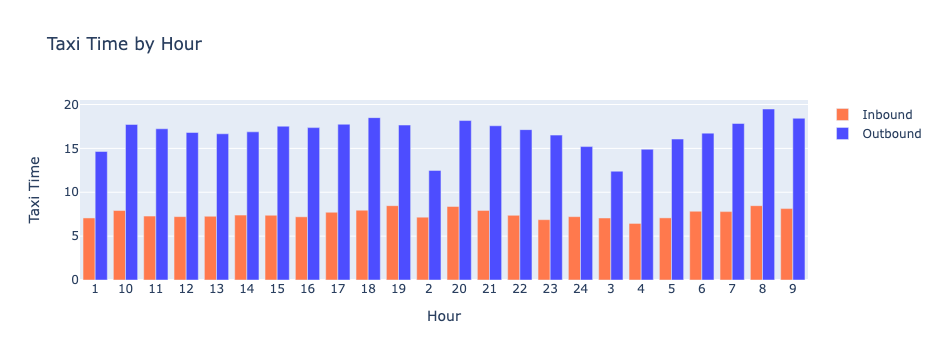

In [70]:
# trace1 - Departure delays
trace1 = go.Bar(
    x=df_arr['arr_hour'],
    y=df_arr['taxi_in'],
    name = 'Inbound',
    marker=dict(color='#ff794d')
)

# trace2 - Arrival delays
trace2 = go.Bar(
    x=df_dep['dep_hour'],
    y=df_dep['taxi_out'],
    name = 'Outbound',
    marker=dict(color='#4d4dff')
)

# create the data
data = [trace1, trace2]

# create the layout
layout = go.Layout(
    title= 'Taxi Time by Hour',
    xaxis=dict(
        title='Hour',
        tickmode='linear'),
    yaxis=dict(
        title='Taxi Time')
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [65]:
# start with flights with arr_delay only
df5c = df_flights[df_flights.carrier_delay.notnull()].copy()
# make bool for positive delays
df5c['bool_dep_delay'] = np.where(df5c.dep_delay >= 1, 1, 0)
df5c['bool_arr_delay'] = np.where(df5c.arr_delay >= 1, 1, 0)
df5c.sort_values('arr_delay')

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,longest_add_gtime,no_name,datetime,day,month,year,arr_hour,dep_hour,bool_dep_delay,bool_arr_delay
281367,2018-12-07,AA,AA_CODESHARE,AA,3059,OO,N762SK,3059,13930,ORD,...,NaN,NaN,2018-12-07,7,12,2018,19,17,1,1
267263,2018-05-09,WN,WN,WN,1003,WN,N7706A,1003,11259,DAL,...,NaN,NaN,2018-05-09,9,5,2018,19,17,1,1
135790,2019-07-08,AA,AA,AA,408,AA,N830AW,408,13577,MYR,...,NaN,NaN,2019-07-08,8,7,2019,15,14,1,1
267216,2018-04-13,DL,DL,DL,2183,DL,N906DA,2183,10397,ATL,...,NaN,NaN,2018-04-13,13,4,2018,10,9,1,1
135798,2019-05-13,NK,NK,NK,385,NK,N611NK,385,10821,BWI,...,NaN,NaN,2019-05-13,13,5,2019,11,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184764,2019-10-05,UA,UA,UA,226,UA,N77520,226,12982,LIH,...,NaN,NaN,2019-10-05,5,10,2019,,16,1,1
413555,2018-02-20,AA,AA_CODESHARE,AA,2852,EV,N612QX,2852,12896,LBB,...,13.0,NaN,2018-02-20,20,2,2018,13,12,1,1
261371,2019-05-04,AA,AA_CODESHARE,AA,3931,MQ,N852AE,3931,11995,GSO,...,NaN,NaN,2019-05-04,4,5,2019,14,12,1,1
340940,2019-07-20,AA,AA,AA,1395,AA,N963AN,1395,13487,MSP,...,NaN,NaN,2019-07-20,20,7,2019,15,12,1,1


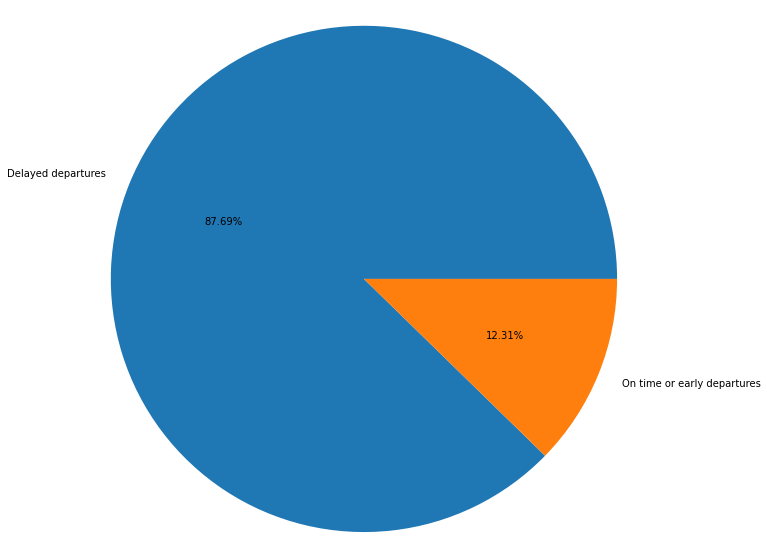

In [66]:
# % of arr_delay flights that sarted with a dep_delay
labels = ['Delayed departures', 'On time or early departures']
sizes = [df5c.bool_dep_delay.value_counts()[1],
         df5c.bool_dep_delay.value_counts()[0] ]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

#### **Task 6**: How many states cover 50% of US air traffic? 

In [73]:
#Take relevant columns
#Split origin_city_name to a State column
#Sum the air_traffic and groupby state.
#Sort in descending order.

df_tsk6 = df_flights[['origin_city_name','air_time']]
df_tsk6[['origin_city_name','state']] = df_tsk6['origin_city_name'].str.split(', ',expand=True)
df_tsk6show = df_tsk6.groupby('state',as_index=False)['air_time'].sum().sort_values(by='air_time',ascending=False)


/var/folders/lf/ty8sx7z57pl1_74grkt85j_c0000gn/T/ipykernel_2435/4127265612.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lf/ty8sx7z57pl1_74grkt85j_c0000gn/T/ipykernel_2435/4127265612.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



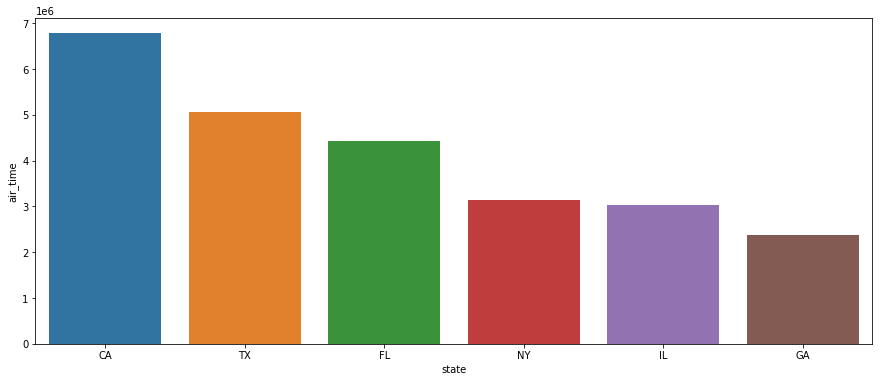

In [72]:
sns.barplot(x='state',y='air_time',data=df_tsk6show.head(6))
plt.show()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [74]:
import warnings
warnings.filterwarnings('ignore')

#Relevant columns: dep_delay, air_time, distance
#Append a column called avg_speed.
#Average speed = (air_time/distance) * 60
#Sort values deep_delay to see weather planes fly faster when there is a departure delay.

df_tsk7 = df_flights[['dep_delay','air_time','distance']].dropna()
df_tsk7['avg_speed'] = (df_flights['distance'] / df_flights['air_time'])*60
df_tsk7.sort_values(by='dep_delay',ascending=False).head(10)

,dep_delay,air_time,distance,avg_speed
292220,1966.0,47.0,308.0,393.191489
340940,1790.0,120.0,852.0,426.000000
261371,1651.0,69.0,461.0,400.869565
413555,1531.0,54.0,282.0,313.333333
184764,1515.0,287.0,2447.0,511.567944
171180,1471.0,97.0,695.0,429.896907
247496,1448.0,96.0,675.0,421.875000
54735,1431.0,19.0,73.0,230.526316
123462,1424.0,81.0,643.0,476.296296
314223,1421.0,40.0,174.0,261.000000


In [75]:
#Test the hypothesis whether planes fly faster when there is a departure delay.
dep_delay_lst = df_tsk7['dep_delay']
avg_speed_lst = df_tsk7['avg_speed']
stat, p_value = st.ttest_rel(dep_delay_lst,avg_speed_lst)
alpha=0.5
print('stat:',stat)
print('p-value:',p_value)
if p_value > alpha:
    print("Planes fly faster when there is a departure delay.")
else:
    print("Plane speed did not change significantly when there is a departure delay.")

stat: -3098.4681656301577
p-value: 0.0
Plane speed did not change significantly when there is a departure delay.


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [80]:
#Algorithm to convert float to time format.
string_num = []
for i in df_flights['dep_time']:
    str_time = str(i)
    if len(str_time) == 4:
        str_time = str_time.split('.')
        str_time = str_time[0]
        str_time = str_time[:1] + ":" + str_time[1:]
        string_num.append('00:00')
    elif len(str_time) == 5:
        str_time = str_time.split('.')
        str_time = str_time[0]
        str_time = str_time[:1] + ":" + str_time[1:]
        string_num.append(str_time)
    elif len(str_time) == 6:
        str_time = str_time.split('.')
        str_time = str_time[0]
        str_time = str_time[:2] + ":" + str_time[2:]
        string_num.append(str_time)
    else:
        string_num.append('--:--')



In [84]:
#Algorithm to create categories of LONG, SHORT, MEDIUM.
category_list = []
for i in df_flights['air_time']:
    if i <= 180:
        category_list.append('SHORT')
    elif i > 180 and i <= 360:
        category_list.append('MEDIUM')
    else: 
        category_list.append('LONG')

In [85]:
#Assign the list to the dataframe.
df_tsk8 = df_flights[['dep_time','air_time','distance']]
df_tsk8['time_format'] = string_num
df_tsk8['haul_type'] = category_list
df_tsk8[['time_hour','time_second']] = df_tsk8['time_format'].str.split(':',expand=True)
#df_tsk8 = df_tsk8.dropna()
df_tsk8.head(3)

,dep_time,air_time,distance,time_format,haul_type,time_hour,time_second
0,855.0,93.0,649.0,8:55,SHORT,8,55
1,631.0,163.0,1145.0,6:31,SHORT,6,31
2,1549.0,140.0,944.0,15:49,SHORT,15,49


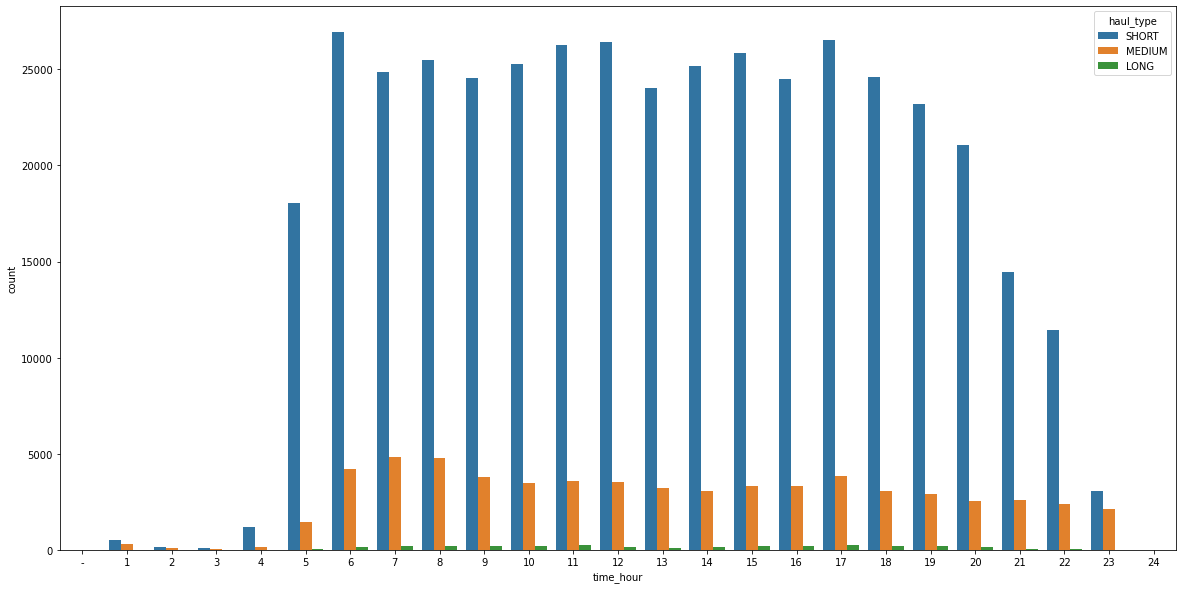

In [86]:
plt.rcParams["figure.figsize"] = (20,10)
sns.countplot(x="time_hour", hue="haul_type", data=df_tsk8, 
              order = ['-','1', '2', '3', '4', '5',
               '6','7','8','9','10','11',
              '12','13','14','15','16','17',
              '18','19','20','21','22','23','24'])
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [87]:
df_tsk9 = df_flights.groupby(['origin'],as_index=False).size()
#Top 10 busiest airports by biggest number of flights.
df_tsk9 = df_tsk9.sort_values(by=['size'],ascending=False)
df_tsk9 = df_tsk9.rename(columns={'size':'number_of_flights'})
df_tsk9.head(10)

,origin,number_of_flights
22,ATL,24260
257,ORD,24097
95,DFW,17972
94,DEN,17336
196,LAX,15464
74,CLT,15412
321,SEA,11713
169,IAH,11094
323,SFO,11018
103,DTW,10957


In [88]:
df_passengers = pd.read_csv('/Users/perpetualokafor/Downloads/mid-term-project-I/passengers.csv')
df_passengers.head()

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,26.0,25.0,388625.0,1250.0,1035.0,0.0,0.0,577.0,3308.0,...,US,United States,6,530,1,2019,12,2,F,DU
1,1,26.0,26.0,323000.0,1300.0,1112.0,0.0,0.0,296.0,2088.0,...,US,United States,6,629,1,2019,12,1,F,DU
2,2,26.0,25.0,288500.0,1250.0,1030.0,0.0,0.0,387.0,2330.0,...,US,United States,6,629,1,2019,12,1,F,DU
3,3,26.0,26.0,421320.0,1690.0,1513.0,0.0,0.0,164.0,1667.0,...,US,United States,6,631,1,2019,12,1,F,DU
4,4,26.0,26.0,340500.0,1300.0,502.0,0.0,0.0,280.0,1773.0,...,US,United States,6,629,1,2019,12,1,F,DU


In [89]:
df_tsk9b = df_passengers[['passengers','origin_airport_id','origin','origin_city_name']]
df_tsk9b = df_tsk9b.sort_values(by=['passengers'], ascending=False)
#Top 10 busiest airports by passenger traffic.
df_tsk9b = df_tsk9b.groupby(['origin_airport_id','origin','origin_city_name'],as_index=False)[['passengers']].sum()
df_tsk9b = df_tsk9b.sort_values(by=['passengers'], ascending=False)
df_tsk9b = df_tsk9b.rename(columns={'passengers':'total_passengers'})
df_tsk9b.head(10)

,origin_airport_id,origin,origin_city_name,total_passengers
139,10397,ATL,"Atlanta, GA",257478059.0
1083,12892,LAX,"Los Angeles, CA",205745255.0
1452,13930,ORD,"Chicago, IL",194019087.0
495,11298,DFW,"Dallas/Fort Worth, TX",163888490.0
493,11292,DEN,"Denver, CO",151024252.0
953,12478,JFK,"New York, NY",148927079.0
1744,14771,SFO,"San Francisco, CA",133266076.0
1081,12889,LAS,"Las Vegas, NV",117526251.0
1732,14747,SEA,"Seattle, WA",113960665.0
397,11057,CLT,"Charlotte, NC",112838675.0


In [90]:
#The Top 10 busiest airports by the biggest number of flights and the passenger traffic they cover.
pd.merge(df_tsk9.head(10),df_tsk9b,how = "left", on = "origin")

,origin,number_of_flights,origin_airport_id,origin_city_name,total_passengers
0,ATL,24260,10397,"Atlanta, GA",257478059.0
1,ORD,24097,13930,"Chicago, IL",194019087.0
2,DFW,17972,11298,"Dallas/Fort Worth, TX",163888490.0
3,DEN,17336,11292,"Denver, CO",151024252.0
4,LAX,15464,12892,"Los Angeles, CA",205745255.0
5,CLT,15412,11057,"Charlotte, NC",112838675.0
6,SEA,11713,14747,"Seattle, WA",113960665.0
7,IAH,11094,12266,"Houston, TX",103908868.0
8,SFO,11018,14771,"San Francisco, CA",133266076.0
9,DTW,10957,11433,"Detroit, MI",86099463.0


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [91]:
#Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
df_tsk10a = df_flights.groupby(['month','op_unique_carrier'])[['arr_delay']].agg('mean')
df_tsk10a.head()

arr_delay
month op_unique_carrier           
1     9E                  5.723706
      9K                  5.312500
      AA                  1.838473
      AS                 -1.653023
      AX                 22.219626

In [92]:
#Find out the distance covered monthly by different air carriers
df_tsk10b = df_flights.groupby(['month','op_unique_carrier'])[['distance']].agg('sum')
df_tsk10b.head()

distance
month op_unique_carrier           
1     9E                  564205.0
      9K                    2008.0
      AA                 4678455.0
      AS                 1416209.0
      AX                  190863.0

<AxesSubplot:xlabel='month'>

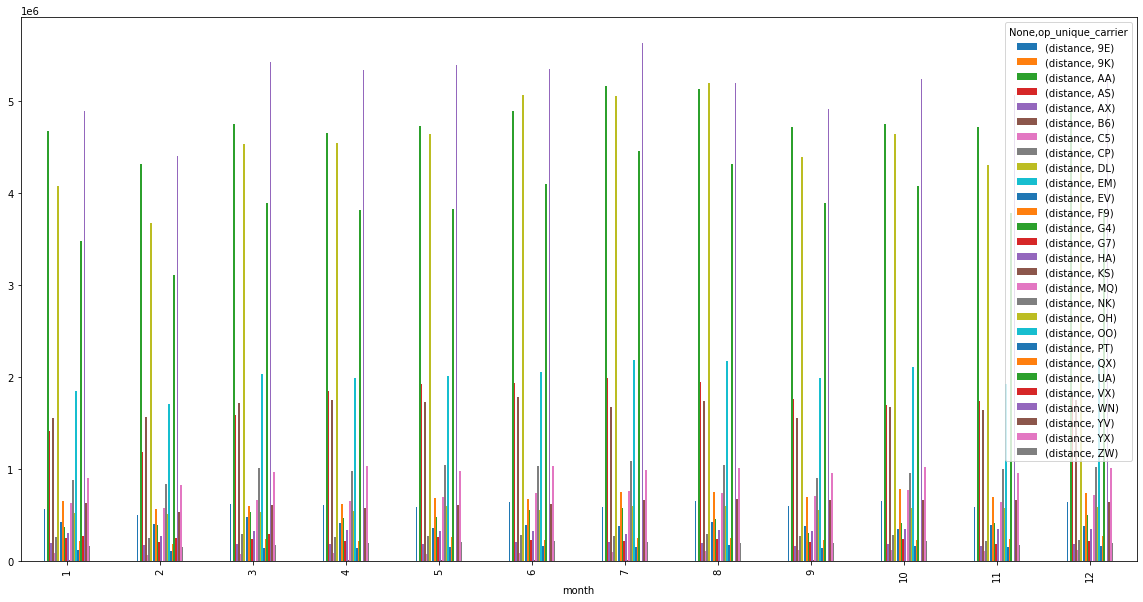

In [93]:
df_tsk10b.unstack().plot.bar()

In [94]:
#Find out the number of passengers that were carried by different air carriers
df_tsk10c = df_passengers.groupby(['unique_carrier_name','unique_carrier'])[['passengers']].agg('sum').reset_index()
df_tsk10c = df_tsk10c[(df_tsk10c != 0).all(1)]
df_tsk10c.head(10)

,unique_carrier_name,unique_carrier,passengers
0,40-Mile Air,Q5,3830.0
1,ABC Aerolineas SA de CV dba Interjet,4O,7938301.0
2,ABS JETS A.S,2AQ,618.0
5,ACM AIR CHARTER GmbH,0CQ,950.0
6,"ADVANCED AIR, LLC",AN,40026.0
7,Abelag Aviation AG,AAB,10.0
8,Acropolis Aviation Ltd.,CRV,851.0
9,Aer Lingus Plc,EI,9578430.0
11,Aerodynamics Inc. d/b/a SkyValue d/b/a SkyValu...,AJQ,180313.0
12,"Aeroenlaces Nacionales, S.A. de C.V. d/b/a Viv...",VB,1140129.0


In [95]:
df_fuel_consum = pd.read_csv('/Users/perpetualokafor/Downloads/mid-term-project-I/fuel_comsumption.csv',index_col=0)
df_fuel_consum.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016


In [96]:
#Find out total fuel comsumption per air carrier
df_tsk10d = df_fuel_consum.groupby(['carrier_name','unique_carrier'])[['total_gallons']].agg('sum').reset_index()
df_tsk10d = df_tsk10d[(df_tsk10d != 0).all(1)]
df_tsk10d.head()

,carrier_name,unique_carrier,total_gallons
0,ABX Air Inc,ABX,6.367883e+06
1,Air Transport International,8C,4.061171e+07
2,Air Wisconsin Airlines Corp,ZW,1.306834e+08
3,Alaska Airlines Inc.,AS,2.678455e+09
4,Allegiant Air,G4,8.497621e+08


In [98]:
df_tsk10e = df_flights.groupby(['op_unique_carrier'])[['distance']].agg('sum').reset_index()
df_tsk10e = df_tsk10e.rename(columns={'op_unique_carrier':'unique_carrier'})
df_tsk10e.head()

,unique_carrier,distance
0,9E,7242123.0
1,9K,6321.0
2,AA,57426654.0
3,AS,20844785.0
4,AX,2214595.0


In [100]:
#Get the average fuel comsumption per passenger per km.(fuel_econ_per_passenger)

df_tsk10f = pd.merge(df_tsk10d,df_tsk10c,how = "left", on = "unique_carrier").dropna()
df_tsk10f = pd.merge(df_tsk10e,df_tsk10f,how = "left", on = "unique_carrier").dropna()
df_tsk10f['fuel_econ_per_passenger'] = (df_tsk10f['total_gallons'] / df_tsk10f['distance']) / df_tsk10f['passengers']
df_tsk10f = df_tsk10f.drop(['carrier_name'], axis=1)
df_tsk10f.head()

,unique_carrier,distance,total_gallons,unique_carrier_name,passengers,fuel_econ_per_passenger
2,AA,57426654.0,1.663489e+10,American Airlines Inc.,715203891.0,4.050200e-07
3,AS,20844785.0,2.678455e+09,Alaska Airlines Inc.,145210038.0,8.848922e-07
5,B6,20144095.0,3.767060e+09,JetBlue Airways,198872059.0,9.403315e-07
8,DL,54654586.0,1.655025e+10,Delta Air Lines Inc.,742511388.0,4.078259e-07
10,EV,4773889.0,2.678243e+06,ExpressJet Airlines LLC,79135585.0,7.089341e-09
